### importing necessary libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

### Importing data set

In [2]:
salary_hike = pd.read_csv('/home/suraj/Downloads/Assignments/Assignment-4/Salary_Data.csv')
salary_hike

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Initial Analysis

In [3]:
salary_hike.shape

(30, 2)

In [4]:
salary_hike.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
salary_hike.dtypes

YearsExperience    float64
Salary             float64
dtype: object

### Assumption check

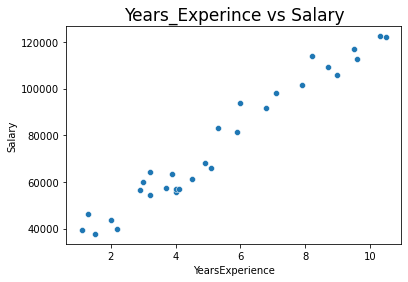

In [8]:
sns.scatterplot(x = 'YearsExperience', y = 'Salary', data = salary_hike)
plt.title('Years_Experince vs Salary',size = 17)
plt.show()

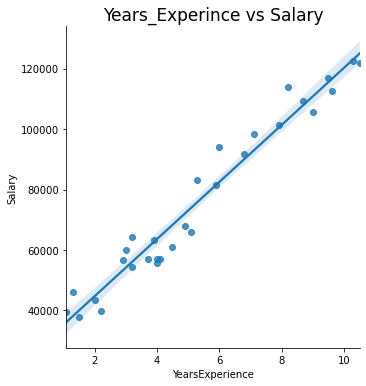

In [9]:
sns.lmplot(x = 'YearsExperience', y = 'Salary', data = salary_hike)
plt.title('Years_Experince vs Salary',size = 17)
plt.show()

In [10]:
salary_hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


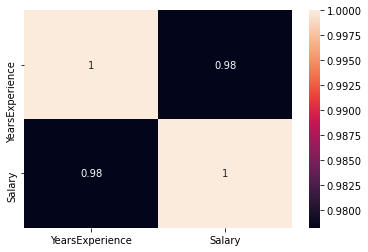

In [11]:
sns.heatmap(salary_hike.corr(),annot=True)
plt.show()

### Model building

In [4]:
linear_model = smf.ols('Salary~YearsExperience',data = salary_hike).fit()

### Model Improvement

In [14]:
# Log transformation
salary_hike['log_years'] = np.log(salary_hike['YearsExperience'])
salary_hike

,YearsExperience,Salary,log_years
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457
5,2.9,56642.0,1.064711
6,3.0,60150.0,1.098612
7,3.2,54445.0,1.163151
8,3.2,64445.0,1.163151
9,3.7,57189.0,1.308333


In [16]:
salary_hike_log = salary_hike[['Salary','log_years']]
salary_hike_log

,Salary,log_years
0,39343.0,0.095310
1,46205.0,0.262364
2,37731.0,0.405465
3,43525.0,0.693147
4,39891.0,0.788457
5,56642.0,1.064711
6,60150.0,1.098612
7,54445.0,1.163151
8,64445.0,1.163151
9,57189.0,1.308333


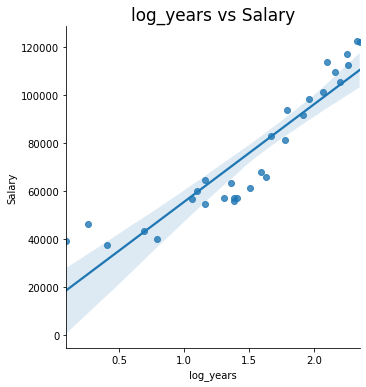

In [17]:
sns.lmplot(x = 'log_years', y = 'Salary', data = salary_hike_log)
plt.title('log_years vs Salary',size = 17)
plt.show()

In [18]:
log_model = smf.ols('Salary~log_years', data=salary_hike_log).fit()

In [21]:
#Square root transformation
salary_hike['sqrt_years'] = np.sqrt(salary_hike['YearsExperience'])
salary_hike

,YearsExperience,Salary,log_years,sqrt_years
0,1.1,39343.0,0.095310,1.048809
1,1.3,46205.0,0.262364,1.140175
2,1.5,37731.0,0.405465,1.224745
3,2.0,43525.0,0.693147,1.414214
4,2.2,39891.0,0.788457,1.483240
5,2.9,56642.0,1.064711,1.702939
6,3.0,60150.0,1.098612,1.732051
7,3.2,54445.0,1.163151,1.788854
8,3.2,64445.0,1.163151,1.788854
9,3.7,57189.0,1.308333,1.923538


In [22]:
salary_hike_sqrt = salary_hike[['Salary','sqrt_years']]
salary_hike_sqrt

,Salary,sqrt_years
0,39343.0,1.048809
1,46205.0,1.140175
2,37731.0,1.224745
3,43525.0,1.414214
4,39891.0,1.483240
5,56642.0,1.702939
6,60150.0,1.732051
7,54445.0,1.788854
8,64445.0,1.788854
9,57189.0,1.923538


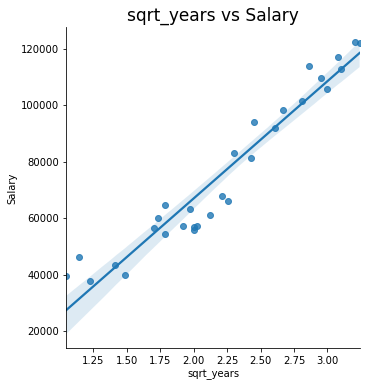

In [23]:
sns.lmplot(x = 'sqrt_years', y = 'Salary', data = salary_hike_sqrt)
plt.title('sqrt_years vs Salary',size = 17)
plt.show()

In [24]:
sqrt_model = smf.ols('Salary~sqrt_years', data=salary_hike_sqrt).fit()

### Model testing

In [26]:
linear_model.summary() #Linear model has the better R-squared value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           1.14e-20
Time:                        23:22:39   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           3.25e-13
Time:                        22:45:46   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_years   4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           8.57e-18
Time:                        22:56:16   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sqrt_years   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model prediction

In [8]:
# Manual prediction 5 years experience
delivery_pred = (25792.200199) + (9449.962321)*(5)
delivery_pred

73042.01180400001

In [9]:
# Automatic Prediction 5,7,9 years experience
new_data=pd.Series([5,7,9])
new_data

0    5
1    7
2    9
dtype: int64

In [10]:
test_data = pd.DataFrame(new_data, columns=['YearsExperience'])
test_data

,YearsExperience
0,5
1,7
2,9


In [11]:
linear_model.predict(test_data)

0     73042.011806
1     91941.936449
2    110841.861092
dtype: float64